In [189]:
## Poser des pixels de façcon optimal.

In [190]:
"""R/place est un projet social où les utilisateurs de Reddit pouvaient placer un pixel de couleur sur une toile virtuelle toutes les cinq minutes. L'objectif était de collaborer avec d'autres utilisateurs pour créer des images ou des motifs sur cette toile. Cependant, étant donné que la toile était ouverte à tous et que chaque pixel était modifiable, cela a souvent conduit à des guerres de pixels où les utilisateurs s'affrontaient pour défendre ou modifier certaines parties de l'image."""

"""On pourrait d'abord ce dire qu'une communauté plus grands est va forcément gagner mais est-ce-que un groupe plus organisé ne pourrait-il pas l'emporter."""

"On pourrait d'abord ce dire qu'une communauté plus grands est va forcément gagner mais est-ce-que un groupe plus organisé ne pourrait-il pas l'emporter."

In [191]:
import numpy as np
import random
from PIL import Image as im
from matplotlib import pyplot as plt
import imageio as iio
import os

In [192]:
#Paramètres:

cote_canvas = 64 #Taille du coté du canvas
matrice_modele1 = np.full((cote_canvas, cote_canvas), 1)
matrice_modele2 = np.full((cote_canvas, cote_canvas), 2)
canvas = np.zeros((cote_canvas, cote_canvas), dtype=np.uint8)

#Pour les listes:
ind_nb_agents = 0
ind_tecp = 1 #Temps entre chaque pixel
ind_nb_correct_chance = 2 #Pourcentage de chance de placer un bon pixel
ind_couleur = 3


In [193]:
def plot_show(canvas, i):
    """sauvergarde un png du canvas dans le dossier image."""
    image = np.zeros((cote_canvas, cote_canvas, 3), dtype=np.uint8)
    color = {0: [255, 255, 255], 1: [255, 0, 0], 2: [0, 255, 0]}
    image[canvas == 0] = color[0]
    image[canvas == 1] = color[1]
    image[canvas == 2] = color[2]
    img = im.fromarray(image)
    img.save(f"images/{i}.png")

In [194]:
"""Sur une toile vide il est compliqué de coordonées un groupe très grand. Il est compliqué de de poser un pixel à l'endroit exact. Pour palier à ça, certaines communautées ont crées des scripts qui affiche à l'écran l'endroit exact où il faut poser un pixel. Les groupes ayant ces scripts avaient un énorme avantage sur ceux qui en avaient pas, ils avaient une 'correct_chance' plus élévés. En plaçant les pixels au moment où il est disponible, permet de poser plus de pixels par heure. Donc en augmentant leurs chances de poser un bon pixel et en diminuant le temps entre chaque pixel, un groupe plus petit pourrait l'emporter."""

"Sur une toile vide il est compliqué de coordonées un groupe très grand. Il est compliqué de de poser un pixel à l'endroit exact. Pour palier à ça, certaines communautées ont crées des scripts qui affiche à l'écran l'endroit exact où il faut poser un pixel. Les groupes ayant ces scripts avaient un énorme avantage sur ceux qui en avaient pas, ils avaient une 'correct_chance' plus élévés. En plaçant les pixels au moment où il est disponible, permet de poser plus de pixels par heure. Donc en augmentant leurs chances de poser un bon pixel et en diminuant le temps entre chaque pixel, un groupe plus petit pourrait l'emporter."

In [195]:
#Un groupe est caractérisé par 4 paramètre: le nombre de personnes dans le groupe, le temps entre chaque pixel moyen, un pourcentage de chance de placer un bon pixel et une couleur.
#Ici on va faire affronter un groupe composé de 50 personnes tres organisé contre un groupe dix fois plus nombreux mais moins organisé
g1 = [100, 5, 0.9, 1]
g2 = [1000, 10, 0.5, 2]
    

In [196]:
def creer_dict_bon_mauvais_pixel(canvas, matrice_modele1, matrice_modele2):
    """Ajoute dans un dictionnaire les pixels bons dans bon_pixel et les mauvais dans mauvais_pixel.
    Les bons pixels sont les pixels qui doivent être remplacés sur le canvas, et les mauvais sont ceux qui ne doivent pas être touchés"""
    remplacer_pixel_g1 = []
    pas_toucher_pixel_g1 = []
    remplacer_pixel_g2 = []
    pas_toucher_pixel_g2 = []
    res = {"remplacer_g1": remplacer_pixel_g1, "pas_toucher_g1": pas_toucher_pixel_g1, "remplacer_g2" : remplacer_pixel_g2, "pas_toucher_g2" : pas_toucher_pixel_g2}
    
    #Remplis le dictionnaire pour le groupe 1, remplit les listes bon_pixel_g1 et mauvais_pixel_g1
    for i in range(cote_canvas):
        for j in range(cote_canvas):
            if(canvas[i][j] != matrice_modele1[i][j]):
                res["remplacer_g1"].append((i, j))
            else:
                res["pas_toucher_g1"].append((i, j))

    #Remplis le dictionnaire pour le groupe 2, remplit les listes bon_pixel_g2 et mauvais_pixel_g2
    for i in range(cote_canvas):
        for j in range(cote_canvas):
            if(canvas[i][j] != matrice_modele2[i][j]):
                res["remplacer_g2"].append((i, j))
            else:
                res["pas_toucher_g2"].append((i, j))
    
    return res     

In [197]:

dict_bon_mauvais_pixel = creer_dict_bon_mauvais_pixel(canvas, matrice_modele1, matrice_modele2)
#dict_bon_mauvais_pixel

In [198]:
def trouve_bon_pixel_g1(dict_bon_mauvais_pixel):
    if dict_bon_mauvais_pixel["remplacer_g1"] == []:
        return None
    
    #Prendre au hasard un pixel dans la liste de ceux à remplacer.
    x = int(random.random()*len(dict_bon_mauvais_pixel["remplacer_g1"]))
    res = dict_bon_mauvais_pixel["remplacer_g1"][x]

    #On retire ce pixel de ceux à remplacer et on le mets dans ceux qu'on doit pas toucher.
    dict_bon_mauvais_pixel["remplacer_g1"].remove(res)
    dict_bon_mauvais_pixel["pas_toucher_g1"].append(res)

    #Si le pixel prit était dans ceux que le g2 ne doit pas toucher alors le mettre dans ceux à remplacer.
    if res in dict_bon_mauvais_pixel["pas_toucher_g2"]:
        dict_bon_mauvais_pixel["remplacer_g2"].append(res)
        dict_bon_mauvais_pixel["pas_toucher_g2"].remove(res)

    #Retourner le pixel
    return res

In [199]:
def trouve_mauvais_pixel_g1(dict_bon_mauvais_pixel):
    if dict_bon_mauvais_pixel["pas_toucher_g1"] == []:
        return None

    #On prend un pixel au hasard dans la liste de ceux qu'on doit pas toucher.
    x = int(random.random()*len(dict_bon_mauvais_pixel["pas_toucher_g1"]))
    res = dict_bon_mauvais_pixel["pas_toucher_g1"][x]

    #On retire le pixel de ceux qu'on doit pas toucher et le mettre dans ceux qu'on doit remplacer.
    dict_bon_mauvais_pixel["pas_toucher_g1"].remove(res)
    dict_bon_mauvais_pixel["remplacer_g1"].append(res)

    return res


In [200]:
def trouve_bon_pixel_g2(dict_bon_mauvais_pixel):
    if dict_bon_mauvais_pixel["remplacer_g2"] == []:
        return None
    
    #Prendre au hasard un pixel dans la liste de ceux à remplacer.
    x = int(random.random()*len(dict_bon_mauvais_pixel["remplacer_g2"]))
    res = dict_bon_mauvais_pixel["remplacer_g2"][x]

    #On retire ce pixel de ceux à remplacer et on le mets dans ceux qu'on doit pas toucher.
    dict_bon_mauvais_pixel["remplacer_g2"].remove(res)
    dict_bon_mauvais_pixel["pas_toucher_g2"].append(res)

    #Si le pixel prit était dans ceux que le g1 ne doit pas toucher alors le mettre dans ceux à remplacer.
    if res in dict_bon_mauvais_pixel["pas_toucher_g1"]:
        dict_bon_mauvais_pixel["remplacer_g1"].append(res)
        dict_bon_mauvais_pixel["pas_toucher_g1"].remove(res)
        
    return res

In [201]:
def trouve_mauvais_pixel_g2(dict_bon_mauvais_pixel):
    if dict_bon_mauvais_pixel["pas_toucher_g2"] == []:
        return None 

    #On prend un pixel au hasard dans la liste de ceux qu'on doit pas toucher.
    x = int(random.random()*len(dict_bon_mauvais_pixel["pas_toucher_g2"]))
    res = dict_bon_mauvais_pixel["pas_toucher_g2"][x]

    #On retire le pixel de ceux qu'on doit pas toucher et le mettre dans ceux qu'on doit remplacer.
    dict_bon_mauvais_pixel["pas_toucher_g2"].remove(res)
    dict_bon_mauvais_pixel["remplacer_g2"].append(res)

    return res


In [202]:
"""
Test:
for i in range(50):
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g1(dict_bon_mauvais_pixel)
    trouve_mauvais_pixel_g1(dict_bon_mauvais_pixel)
    trouve_bon_pixel_g2(dict_bon_mauvais_pixel)
    trouve_mauvais_pixel_g2(dict_bon_mauvais_pixel)
dict_bon_mauvais_pixel"""

'\nTest:\nfor i in range(50):\n    trouve_bon_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)\n    trouve_mauvais_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)\n    trouve_bon_pixel_g2(canvas, matrice_modele2, dict_bon_mauvais_pixel)\n    trouve_mauvais_pixel_g2(canvas, matrice_modele2, dict_bon_mauvais_pixel)\ndict_bon_mauvais_pixel'

In [203]:
def simulation(g1, g2, canvas, dict_bon_mauvais_pixel):
    """Fais affonter deux groupes"""
    nb_modifs_par_heure1 = g1[ind_nb_agents] / (g1[ind_tecp]/60)
    nb_modifs_par_heure2 = g2[ind_nb_agents] / (g2[ind_tecp]/60)
    tmp1 = nb_modifs_par_heure1
    tmp2 = nb_modifs_par_heure2
    #n = 0
    #print(n) #Affiche le canvas à chaque étape
    #print(canvas)
    #n += 1
    plot_show(canvas, i)#enregistre le canvas a chaque étapes dans le dossier images
    nb_modifs_par_heure1 = tmp1
    nb_modifs_par_heure2 = tmp2
    while((nb_modifs_par_heure1 > 0) or (nb_modifs_par_heure2 > 0)): #Tant qu'il reste des pixels à poser
        if(nb_modifs_par_heure1 > 0): #si il y a plus de pixels pour le groupe 1, on arrete de poser

            #On prend un nombre au hasard, si correct_chance est grand alors y a une grande chance que le nombre pioché au hasard soit inférieur à correct_chance donc une grande chance de poser un pixel bon.
            if (random.random() < g1[ind_nb_correct_chance]): #placer un bon pixel.
                pixel = trouve_bon_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)
                if (pixel != None):
                    x, y = pixel
                    canvas[x][y] = g1[ind_couleur]
                    nb_modifs_par_heure1-=1
                
            else: #Place un mauvais pixel
                pixel = trouve_mauvais_pixel_g1(canvas, matrice_modele1, dict_bon_mauvais_pixel)
                if (pixel != None):
                    x, y = pixel
                    canvas[x][y] = 0
                    nb_modifs_par_heure1-=1
            
        if(nb_modifs_par_heure2 > 0): # pareil pour groupe 2
                
            if (random.random() < g2[ind_nb_correct_chance]):
                pixel = trouve_bon_pixel_g2(canvas, matrice_modele2, dict_bon_mauvais_pixel)
                if (pixel != None):
                        x2, y2= pixel
                        canvas[x2][y2] = g2[ind_couleur]
                        nb_modifs_par_heure2-=1
                
            else:
                pixel = trouve_mauvais_pixel_g2(canvas, matrice_modele2, dict_bon_mauvais_pixel)
                if (pixel != None):
                    x2, y2 = pixel
                    canvas[x2][y2] = 0
                    nb_modifs_par_heure2-=1



In [204]:
#simulation(g1, g2, matrice_modele1, matrice_modele2, canvas, 24, creer_dict_bon_mauvais_pixel(canvas, matrice_modele1, matrice_modele2,))

In [205]:
def taux_completion(canvas, matrice_modele):
    return np.sum(canvas == matrice_modele) / (cote_canvas*cote_canvas)

In [206]:
#mat = np.full((cote_canvas, cote_canvas), 1)
#taux_completion(canvas, mat)

0.0

[0.0, 0.027099609375, 0.052001953125, 0.031494140625, 0.024169921875, 0.034912109375, 0.025390625, 0.024658203125, 0.020263671875, 0.014404296875, 0.015869140625, 0.01708984375, 0.0205078125, 0.000732421875, 0.009033203125, 0.000244140625, 0.008056640625, 0.0078125, 0.03173828125, 0.014404296875, 0.004638671875, 0.00439453125, 0.025634765625, 0.024658203125]


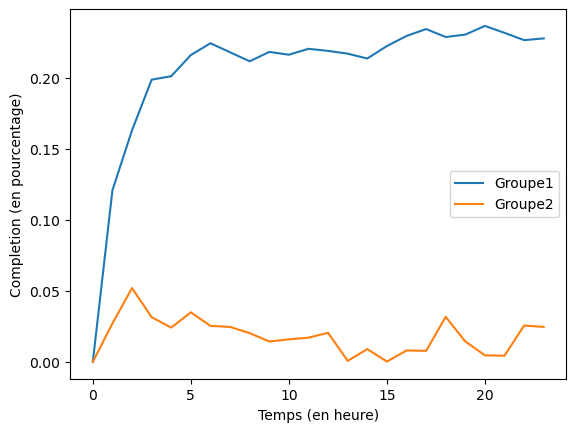

In [207]:
l1 = []
l2 = []
for i in range(24): #On lance la simulation pour une journée.(24h)
    """Lance la simulation 24 fois, et on ajouter le taux de completion a chaque boucle dans une liste"""
    l1.append(taux_completion(canvas, matrice_modele1))
    l2.append(taux_completion(canvas, matrice_modele2))
    simulation(g1, g2, canvas, dict_bon_mauvais_pixel)

#Affiche d'un graphique du taux de completion en fontion du temps du groupe 1 et 2
x = [i for i in range(24)]
y1 = l1
y2 = l2
print(y2)
plt.plot(x, y1, label = "Groupe1")
plt.plot(x, y2, label = "Groupe2")
plt.xlabel("Temps (en heure)")
plt.ylabel("Completion (en pourcentage)")
plt.legend()

In [208]:
#On observe que le groupe 1 l'emporte sur le groupe 2 largement donc dans ce cas un groupe plus organisé peut battre un groupe 10 fois plus nombreux

In [209]:
#Création du gif:

frames = np.stack([iio.imread(f"images/{i}.png") for i in range(24)], axis = 0)
iio.mimwrite('rplace.gif', frames)


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13612\354753499.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = np.stack([iio.imread(f"images/{i}.png") for i in range(24)], axis = 0)


In [213]:
#Essayons de trouver un correct_chance optimal pour des nb_agents et tecp fixé:

In [ ]:
def correct_chance_optimal(canvas, )